In [1]:
%pylab inline
import pandas as pd
import sys
import gc

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"../python/rrvf2017/")

In [3]:
from rrvf_data import read_data,show_data,show_data2,show_features, normalize, DataGen

In [4]:
columns,data=read_data()
len(columns),data.shape

(1, 829, 517) (32, 829, 517)


(33, (829, 517, 33))

In [5]:
gc.collect()

15

In [6]:
def get_index(cols):
    lst=[]
    for c in cols:
        lst.append(np.where(columns==c)[0][0])
    return np.array(lst)

In [7]:
rawy=data[:,:,get_index(['visitors'])[0]].copy()
rawy.shape

(829, 517)

In [10]:
rawy[rawy==0]=np.nan

In [49]:
np.nanstd(rawy)

0.80772406

In [32]:
import rrvf_data

In [22]:
df=pd.DataFrame({'ymean':np.nanmean(rawy,0)})

/home/bo/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


In [30]:
df['cnt']=np.sum(rawy>0,0)
df['std']=np.nanstd(rawy,0)
df['my2']=np.nanmean(rawy*rawy,0)

/home/bo/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/home/bo/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


In [39]:
df['date']=pd.to_datetime(rrvf_data.idx_to_date(df.index))

In [45]:
df['day']=df['date'].map(lambda u: u.weekday())

In [47]:
df=df.dropna()

In [50]:
df.groupby('day').mean()

ymean         cnt       std       my2
day                                          
0    2.622987  465.911765  0.803666  7.543894
1    2.668938  529.632353  0.771611  7.732587
2    2.742134  541.338235  0.772127  8.126822
3    2.734042  558.764706  0.770231  8.080564
4    2.936449  584.797101  0.756729  9.206827
5    3.059475  569.014493  0.765566  9.955305
6    2.892914  441.044118  0.876765  9.145122

In [48]:
df

ymean  cnt       std        my2       date  day
0    2.632437   48  1.043994   8.019647 2016-01-01    4
1    3.077321   63  0.824239  10.149269 2016-01-02    5
2    3.091436   81  0.870722  10.315129 2016-01-03    6
3    2.829584  157  0.785272   8.623199 2016-01-04    0
4    2.639653  231  0.746056   7.524374 2016-01-05    1
5    2.593516  250  0.775804   7.328202 2016-01-06    2
6    2.637008  261  0.745034   7.508891 2016-01-07    3
7    2.902226  277  0.721220   8.943063 2016-01-08    4
8    3.049088  283  0.733953   9.835635 2016-01-09    5
9    3.051592  227  0.818283   9.981798 2016-01-10    6
10   2.827787  202  0.835276   8.694076 2016-01-11    0
11   2.567040  252  0.755426   7.160363 2016-01-12    1
12   2.643898  263  0.816085   7.656185 2016-01-13    2
13   2.701020  274  0.774294   7.895037 2016-01-14    3
14   2.944007  290  0.764833   9.252145 2016-01-15    4
15   3.094960  282  0.748634  10.139221 2016-01-16    5
16   2.818592  216  0.869679   8.700798 2016-01-17    6
17   2.454403  226  0.784458   6.639472 2016-01-18    0
18   2.593611  267  0.778015   7.332126 2016-01-19    1
19   2.707873  263  0.754034   7.901140 2016-01-20    2
20   2.765332  278  0.750817   8.210789 2016-01-21    3
21   2.962238  290  0.701777   9.267344 2016-01-22    4
22   3.032751  289  0.721914   9.718742 2016-01-23    5
23   2.786298  202  0.875348   8.529696 2016-01-24    6
24   2.578448  236  0.784375   7.263645 2016-01-25    0
25   2.670760  265  0.789262   7.755886 2016-01-26    1
26   2.778294  274  0.729521   8.251114 2016-01-27    2
27   2.742702  281  0.738087   8.067188 2016-01-28    3
28   2.855085  288  0.750071   8.714113 2016-01-29    4
29   3.061681  289  0.753206   9.941202 2016-01-30    5
..        ...  ...       ...        ...        ...  ...
448  3.029352  789  0.797077   9.812323 2017-03-24    4
449  3.130338  776  0.824084  10.478154 2017-03-25    5
450  2.871518  600  0.915901   9.084476 2017-03-26    6
451  2.671549  667  0.823263   7.814932 2017-03-27    0
452  2.780377  736  0.822279   8.406634 2017-03-28    1
453  2.896274  730  0.794340   9.019376 2017-03-29    2
454  2.853136  760  0.800088   8.780524 2017-03-30    3
455  2.960311  786  0.800963   9.404970 2017-03-31    4
456  3.013678  771  0.805704   9.731416 2017-04-01    5
457  2.870811  596  0.945962   9.136386 2017-04-02    6
458  2.637020  649  0.841665   7.662266 2017-04-03    0
459  2.649873  719  0.818467   7.691704 2017-04-04    1
460  2.733235  725  0.790572   8.095554 2017-04-05    2
461  2.663090  748  0.800638   7.733069 2017-04-06    3
462  2.896275  783  0.798579   9.026152 2017-04-07    4
463  3.037394  771  0.787917   9.846578 2017-04-08    5
464  2.843237  593  0.895074   8.885154 2017-04-09    6
465  2.559464  647  0.787969   7.171742 2017-04-10    0
466  2.496058  725  0.793790   6.860403 2017-04-11    1
467  2.717749  715  0.800668   8.027230 2017-04-12    2
468  2.716816  758  0.782423   7.993263 2017-04-13    3
469  2.973139  791  0.805442   9.488289 2017-04-14    4
470  3.127319  767  0.766392  10.367496 2017-04-15    5
471  2.929113  608  0.923810   9.433119 2017-04-16    6
472  2.507296  640  0.784701   6.902266 2017-04-17    0
473  2.661333  723  0.785013   7.698936 2017-04-18    1
474  2.754818  734  0.800084   8.229150 2017-04-19    2
475  2.713766  749  0.780081   7.973046 2017-04-20    3
476  2.999004  784  0.775991   9.596184 2017-04-21    4
477  3.075531  774  0.807621  10.111150 2017-04-22    5

[478 rows x 6 columns]

In [11]:
cnt=np.sum(rawy>0,0)

/home/bo/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [12]:
plt.plot(cnt)

In [18]:
plt.plot(np.nanmean(rawy,0)[-80:-39])

/home/bo/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


/home/bo/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice.
  if __name__ == '__main__':


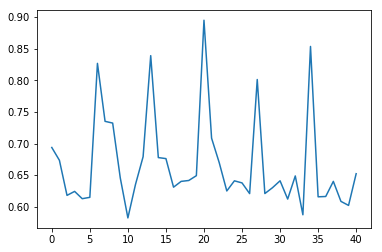

In [19]:
plt.plot(np.nanvar(rawy,0)[-80:-39])